# Rain , Snow Prediction - EDA and Classification

#### By: Mada Abudahish & Samaher AL-hadi

- Our goal for this project is to predict the weather of a day.

## Introduction

The third project of the Data Science Bootcamp T5 is called Predicting weather Using Classification. Through the project, we will predict weather is rainn or snow. Hence, this project aims to find the best ML models to predict weather based on many features.

- The datasets that will be used in this project is a public source from Kaggle.

## Data Description

After we obtained the datasets these are the features used:

- **Formatted Date**: Time of Szeged, Hungary area, between 2006 and 2016
- **Summary**: hourly summary of weather.
- **Precip Type**: rain or snow.
- **Temperature (C)**: Temperature in celsius.
- **Apparent Temperature (C)**: is the temperature equivalent perceived by humans.
- **Humidity**: is the concentration of water vapour present in the air.
- **Wind Speed (km/h)**: express wind speed in kilometres  per hour  
- **Wind Bearing (degrees)**: Wind direction  in degree. 
- **Visibility (km)**: measure the optical range.
- **Loud Cover**: efers to the fraction of the sky obscured by clouds 
- **Pressure (millibars)**:Atmospheric pressure.
- **Daily Summary**: Daily summary of weather.

### Importing libreries:

In [1]:
#----imports Data exploration and visualization

import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
from scipy import stats

from sqlalchemy import create_engine

#----imports Modeles 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesRegressor
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler 
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,precision_score,\
                            recall_score, accuracy_score,roc_auc_score, f1_score, plot_roc_curve
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib

In [2]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

_______

### Load Dataset

In [3]:
weather_data = pd.read_csv('weatherHistory.csv')

### use SQL to load dataset 

In [4]:
engine = create_engine('sqlite://', echo=False)

# run this to add the data to a table in the database
weather_data.to_sql("weather_data",con=engine)
weather=pd.read_sql('SELECT * FROM weather_data ;',engine)

## Data Exploration and Assessing

In [5]:
weather.head(5)

index                 Formatted Date        Summary Precip Type  \
0      0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   

   Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0         9.472222                  7.388889      0.89            14.1197   
1         9.355556                  7.227778      0.86            14.2646   
2         9.377778                  9.377778      0.89             3.9284   
3         8.288889                  5.944444      0.83            14.1036   
4         8.755556                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   
3                   269.0          15.8263         0.0               1016.41   
4                   259.0          15.8263         0.0               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

In [6]:
#Checking DataFrame size
print(f"- The dataset containes {weather.shape[0]} days records with {weather.shape[1]} columns.")

- The dataset containes 96453 days records with 13 columns.


In [7]:
#Checking info about dataframe
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     96453 non-null  int64  
 1   Formatted Date            96453 non-null  object 
 2   Summary                   96453 non-null  object 
 3   Precip Type               95936 non-null  object 
 4   Temperature (C)           96453 non-null  float64
 5   Apparent Temperature (C)  96453 non-null  float64
 6   Humidity                  96453 non-null  float64
 7   Wind Speed (km/h)         96453 non-null  float64
 8   Wind Bearing (degrees)    96453 non-null  float64
 9   Visibility (km)           96453 non-null  float64
 10  Loud Cover                96453 non-null  float64
 11  Pressure (millibars)      96453 non-null  float64
 12  Daily Summary             96453 non-null  object 
dtypes: float64(8), int64(1), object(4)
memory usage: 9.6+ MB


In [8]:
#Checking descriptive statistics for numerical columns.
weather.describe()

index  Temperature (C)  Apparent Temperature (C)      Humidity  \
count  96453.000000     96453.000000              96453.000000  96453.000000   
mean   48226.000000        11.932678                 10.855029      0.734899   
std    27843.727094         9.551546                 10.696847      0.195473   
min        0.000000       -21.822222                -27.716667      0.000000   
25%    24113.000000         4.688889                  2.311111      0.600000   
50%    48226.000000        12.000000                 12.000000      0.780000   
75%    72339.000000        18.838889                 18.838889      0.890000   
max    96452.000000        39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count       96453.000000            96453.000000     96453.000000     96453.0   
mean           10.810640              187.509232        10.347325         0.0   
std             6.913571              107.383428         4.192123         0.0   
min             0.000000                0.000000         0.000000         0.0   
25%             5.828200              116.000000         8.339800         0.0   
50%             9.965900              180.000000        10.046400         0.0   
75%            14.135800              290.000000        14.812000         0.0   
max            63.852600              359.000000        16.100000         0.0   

       Pressure (millibars)  
count          96453.000000  
mean            1003.235956  
std              116.969906  
min                0.000000  
25%             1011.900000  
50%             1016.450000  
75%             1021.090000  
max             1046.380000

## Clean Data

- Remove whitespace.
- Drop duplicates.
- Check null.
- Remove Unnecessary columns.
- Rename columns.
- Remove outlire

In [9]:
# Remove spaces at columns names
weather.columns = weather.columns.str.strip()
weather.columns

Index(['index', 'Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [10]:
weather.drop(['index'], axis=1, inplace=True)

In [11]:
#Checking null values 
weather.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [12]:
#Drop nulls values
weather.dropna(inplace= True)

In [13]:
#Checking duplicates rows and drop.
weather.drop_duplicates(keep="first", inplace=True)
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95912 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            95912 non-null  object 
 1   Summary                   95912 non-null  object 
 2   Precip Type               95912 non-null  object 
 3   Temperature (C)           95912 non-null  float64
 4   Apparent Temperature (C)  95912 non-null  float64
 5   Humidity                  95912 non-null  float64
 6   Wind Speed (km/h)         95912 non-null  float64
 7   Wind Bearing (degrees)    95912 non-null  float64
 8   Visibility (km)           95912 non-null  float64
 9   Loud Cover                95912 non-null  float64
 10  Pressure (millibars)      95912 non-null  float64
 11  Daily Summary             95912 non-null  object 
dtypes: float64(8), object(4)
memory usage: 9.5+ MB


In [14]:
weather['Loud Cover'].unique()

array([0.])

In [15]:
# Dropping the column 'Loud Cover'
weather = weather.drop('Loud Cover', axis=1)

In [16]:
# Time is converting to UTC format
weather['Formatted Date'] = pd.to_datetime(weather['Formatted Date'], utc=True)
weather['Formatted Date'].head()

0   2006-03-31 22:00:00+00:00
1   2006-03-31 23:00:00+00:00
2   2006-04-01 00:00:00+00:00
3   2006-04-01 01:00:00+00:00
4   2006-04-01 02:00:00+00:00
Name: Formatted Date, dtype: datetime64[ns, UTC]

In [17]:
#split the (Formatted Date) column into 5 columns (year,month,day,date,time)
weather['year']= weather['Formatted Date'].dt.year
weather['month']= weather['Formatted Date'].dt.month
weather['day']= weather['Formatted Date'].dt.day
weather['Date'] = pd.to_datetime(weather['Formatted Date']).dt.date
weather['Time'] = pd.to_datetime(weather['Formatted Date']).dt.time

In [18]:
# Dropping the column 'Formatted Date'
weather.drop(['Formatted Date'], axis=1, inplace=True)

### Rename columns

In [19]:
#rename columns
weather.rename(
    inplace=True,
    columns={'Precip Type':'Precip_Type',
             'Temperature (C)':'Temperature',
             'Apparent Temperature (C)':'Apparent_Temperature',
             'Humidity':'Humidity',
             'Wind Speed (km/h)':'Wind_Speed',
             'Wind Bearing (degrees)':'Wind_Bearing',
             'Visibility (km)':'Visibility',
             'Pressure (millibars)':'Pressure',
             'Daily Summary':'Daily_Summary'
    })

In [20]:
#Change the Columns in dataframe Names to upper Case
weather.columns= weather.columns.str.upper()
weather.head(10)

SUMMARY PRECIP_TYPE  TEMPERATURE  APPARENT_TEMPERATURE  HUMIDITY  \
0  Partly Cloudy        rain     9.472222              7.388889      0.89   
1  Partly Cloudy        rain     9.355556              7.227778      0.86   
2  Mostly Cloudy        rain     9.377778              9.377778      0.89   
3  Partly Cloudy        rain     8.288889              5.944444      0.83   
4  Mostly Cloudy        rain     8.755556              6.977778      0.83   
5  Partly Cloudy        rain     9.222222              7.111111      0.85   
6  Partly Cloudy        rain     7.733333              5.522222      0.95   
7  Partly Cloudy        rain     8.772222              6.527778      0.89   
8  Partly Cloudy        rain    10.822222             10.822222      0.82   
9  Partly Cloudy        rain    13.772222             13.772222      0.72   

   WIND_SPEED  WIND_BEARING  VISIBILITY  PRESSURE  \
0     14.1197         251.0     15.8263   1015.13   
1     14.2646         259.0     15.8263   1015.63   
2      3.9284         204.0     14.9569   1015.94   
3     14.1036         269.0     15.8263   1016.41   
4     11.0446         259.0     15.8263   1016.51   
5     13.9587         258.0     14.9569   1016.66   
6     12.3648         259.0      9.9820   1016.72   
7     14.1519         260.0      9.9820   1016.84   
8     11.3183         259.0      9.9820   1017.37   
9     12.5258         279.0      9.9820   1017.22   

                       DAILY_SUMMARY  YEAR  MONTH  DAY        DATE      TIME  
0  Partly cloudy throughout the day.  2006      3   31  2006-03-31  22:00:00  
1  Partly cloudy throughout the day.  2006      3   31  2006-03-31  23:00:00  
2  Partly cloudy throughout the day.  2006      4    1  2006-04-01  00:00:00  
3  Partly cloudy throughout the day.  2006      4    1  2006-04-01  01:00:00  
4  Partly cloudy throughout the day.  2006      4    1  2006-04-01  02:00:00  
5  Partly cloudy throughout the day.  2006      4    1  2006-04-01  03:00:00  
6  Partly cloudy throughout the day.  2006      4    1  2006-04-01  04:00:00  
7  Partly cloudy throughout the day.  2006      4    1  2006-04-01  05:00:00  
8  Partly cloudy throughout the day.  2006      4    1  2006-04-01  06:00:00  
9  Partly cloudy throughout the day.  2006      4    1  2006-04-01  07:00:00

**After Exploring the weather dataset, we found**:

- Columns should be converted into categorial columns such as 'Precip Type', 'Summary', and extra.
- Converting some columns to float/integer by cleaning them.
- Dropping 'Loud Cover','Formatted Date'. 
- Need to add new columns 'SEASON'.

## Feature Engineering

In [21]:
def find_season(month, hemisphere):
    if hemisphere == 'Southern':
        season_month_south = {
            12:'Summer', 1:'Summer', 2:'Summer',
            3:'Autumn', 4:'Autumn', 5:'Autumn',
            6:'Winter', 7:'Winter', 8:'Winter',
            9:'Spring', 10:'Spring', 11:'Spring'}
        return season_month_south.get(month)
        
    elif hemisphere == 'Northern':
        season_month_north = {
            12:'Winter', 1:'Winter', 2:'Winter',
            3:'Spring', 4:'Spring', 5:'Spring',
            6:'Summer', 7:'Summer', 8:'Summer',
            9:'Autumn', 10:'Autumn', 11:'Autumn'}
        return season_month_north.get(month)
    else:
        print('Invalid selection. Please select a hemisphere and try again')

In [22]:
season_list = []
hemisphere = 'Southern'
for month in weather['MONTH']:
    season = find_season(month, hemisphere)
    season_list.append(season)
    
weather['SEASON'] = season_list

In [23]:
weather.loc[weather['SEASON']=='Winter','SEASON']=0
weather.loc[weather['SEASON']=='Spring','SEASON']=1
weather.loc[weather['SEASON']=='Autumn','SEASON']=2
weather.loc[weather['SEASON']=='Summer','SEASON']=3

In [24]:
weather.head(1)

SUMMARY PRECIP_TYPE  TEMPERATURE  APPARENT_TEMPERATURE  HUMIDITY  \
0  Partly Cloudy        rain     9.472222              7.388889      0.89   

   WIND_SPEED  WIND_BEARING  VISIBILITY  PRESSURE  \
0     14.1197         251.0     15.8263   1015.13   

                       DAILY_SUMMARY  YEAR  MONTH  DAY        DATE      TIME  \
0  Partly cloudy throughout the day.  2006      3   31  2006-03-31  22:00:00   

  SEASON  
0      2

> ### This section will encode the columns into categorical columns.

First we starte with target'Precip Type'

In [25]:
#check target value
weather['PRECIP_TYPE'].value_counts()

rain    85200
snow    10712
Name: PRECIP_TYPE, dtype: int64

In [26]:
weather['PRECIP_TYPE'].unique()

array(['rain', 'snow'], dtype=object)

In [27]:
# Imputing binary values in type column 
weather.loc[weather['PRECIP_TYPE']=='rain','PRECIP_TYPE']=1
weather.loc[weather['PRECIP_TYPE']=='snow','PRECIP_TYPE']=0

## CATEGORICAL FEATURES

In [28]:
categorical_features = [feature for feature in weather.columns if weather[feature].dtype == 'O']
print(f"len of categorical features {len(categorical_features)}")
weather[categorical_features].head()

len of categorical features 6


SUMMARY PRECIP_TYPE                      DAILY_SUMMARY        DATE  \
0  Partly Cloudy           1  Partly cloudy throughout the day.  2006-03-31   
1  Partly Cloudy           1  Partly cloudy throughout the day.  2006-03-31   
2  Mostly Cloudy           1  Partly cloudy throughout the day.  2006-04-01   
3  Partly Cloudy           1  Partly cloudy throughout the day.  2006-04-01   
4  Mostly Cloudy           1  Partly cloudy throughout the day.  2006-04-01   

       TIME SEASON  
0  22:00:00      2  
1  23:00:00      2  
2  00:00:00      2  
3  01:00:00      2  
4  02:00:00      2

## NUMERICAL FEATURES

In [29]:
categorical_features = [feature for feature in weather.columns if weather[feature].dtype != 'O']
print(f"len of Numerical features {len(categorical_features)}")
weather[categorical_features].head()

len of Numerical features 10


TEMPERATURE  APPARENT_TEMPERATURE  HUMIDITY  WIND_SPEED  WIND_BEARING  \
0     9.472222              7.388889      0.89     14.1197         251.0   
1     9.355556              7.227778      0.86     14.2646         259.0   
2     9.377778              9.377778      0.89      3.9284         204.0   
3     8.288889              5.944444      0.83     14.1036         269.0   
4     8.755556              6.977778      0.83     11.0446         259.0   

   VISIBILITY  PRESSURE  YEAR  MONTH  DAY  
0     15.8263   1015.13  2006      3   31  
1     15.8263   1015.63  2006      3   31  
2     14.9569   1015.94  2006      4    1  
3     15.8263   1016.41  2006      4    1  
4     15.8263   1016.51  2006      4    1

In [30]:
# Converting categorical data into numerical data
le = LabelEncoder()
weather['PRECIP_TYPE']=le.fit_transform(weather['PRECIP_TYPE']).astype('float')
weather['SUMMARY']=le.fit_transform(weather['SUMMARY']).astype('float')
weather['SEASON']=le.fit_transform(weather['SEASON']).astype('float')
weather.head()

SUMMARY  PRECIP_TYPE  TEMPERATURE  APPARENT_TEMPERATURE  HUMIDITY  \
0     19.0          1.0     9.472222              7.388889      0.89   
1     19.0          1.0     9.355556              7.227778      0.86   
2     17.0          1.0     9.377778              9.377778      0.89   
3     19.0          1.0     8.288889              5.944444      0.83   
4     17.0          1.0     8.755556              6.977778      0.83   

   WIND_SPEED  WIND_BEARING  VISIBILITY  PRESSURE  \
0     14.1197         251.0     15.8263   1015.13   
1     14.2646         259.0     15.8263   1015.63   
2      3.9284         204.0     14.9569   1015.94   
3     14.1036         269.0     15.8263   1016.41   
4     11.0446         259.0     15.8263   1016.51   

                       DAILY_SUMMARY  YEAR  MONTH  DAY        DATE      TIME  \
0  Partly cloudy throughout the day.  2006      3   31  2006-03-31  22:00:00   
1  Partly cloudy throughout the day.  2006      3   31  2006-03-31  23:00:00   
2  Partly cloudy throughout the day.  2006      4    1  2006-04-01  00:00:00   
3  Partly cloudy throughout the day.  2006      4    1  2006-04-01  01:00:00   
4  Partly cloudy throughout the day.  2006      4    1  2006-04-01  02:00:00   

   SEASON  
0     2.0  
1     2.0  
2     2.0  
3     2.0  
4     2.0

_______

## Data Analysis and Visulizations:

Now that we have a nice, filtered dataset, let's generate visuals to better understand the target and feature-target relationships

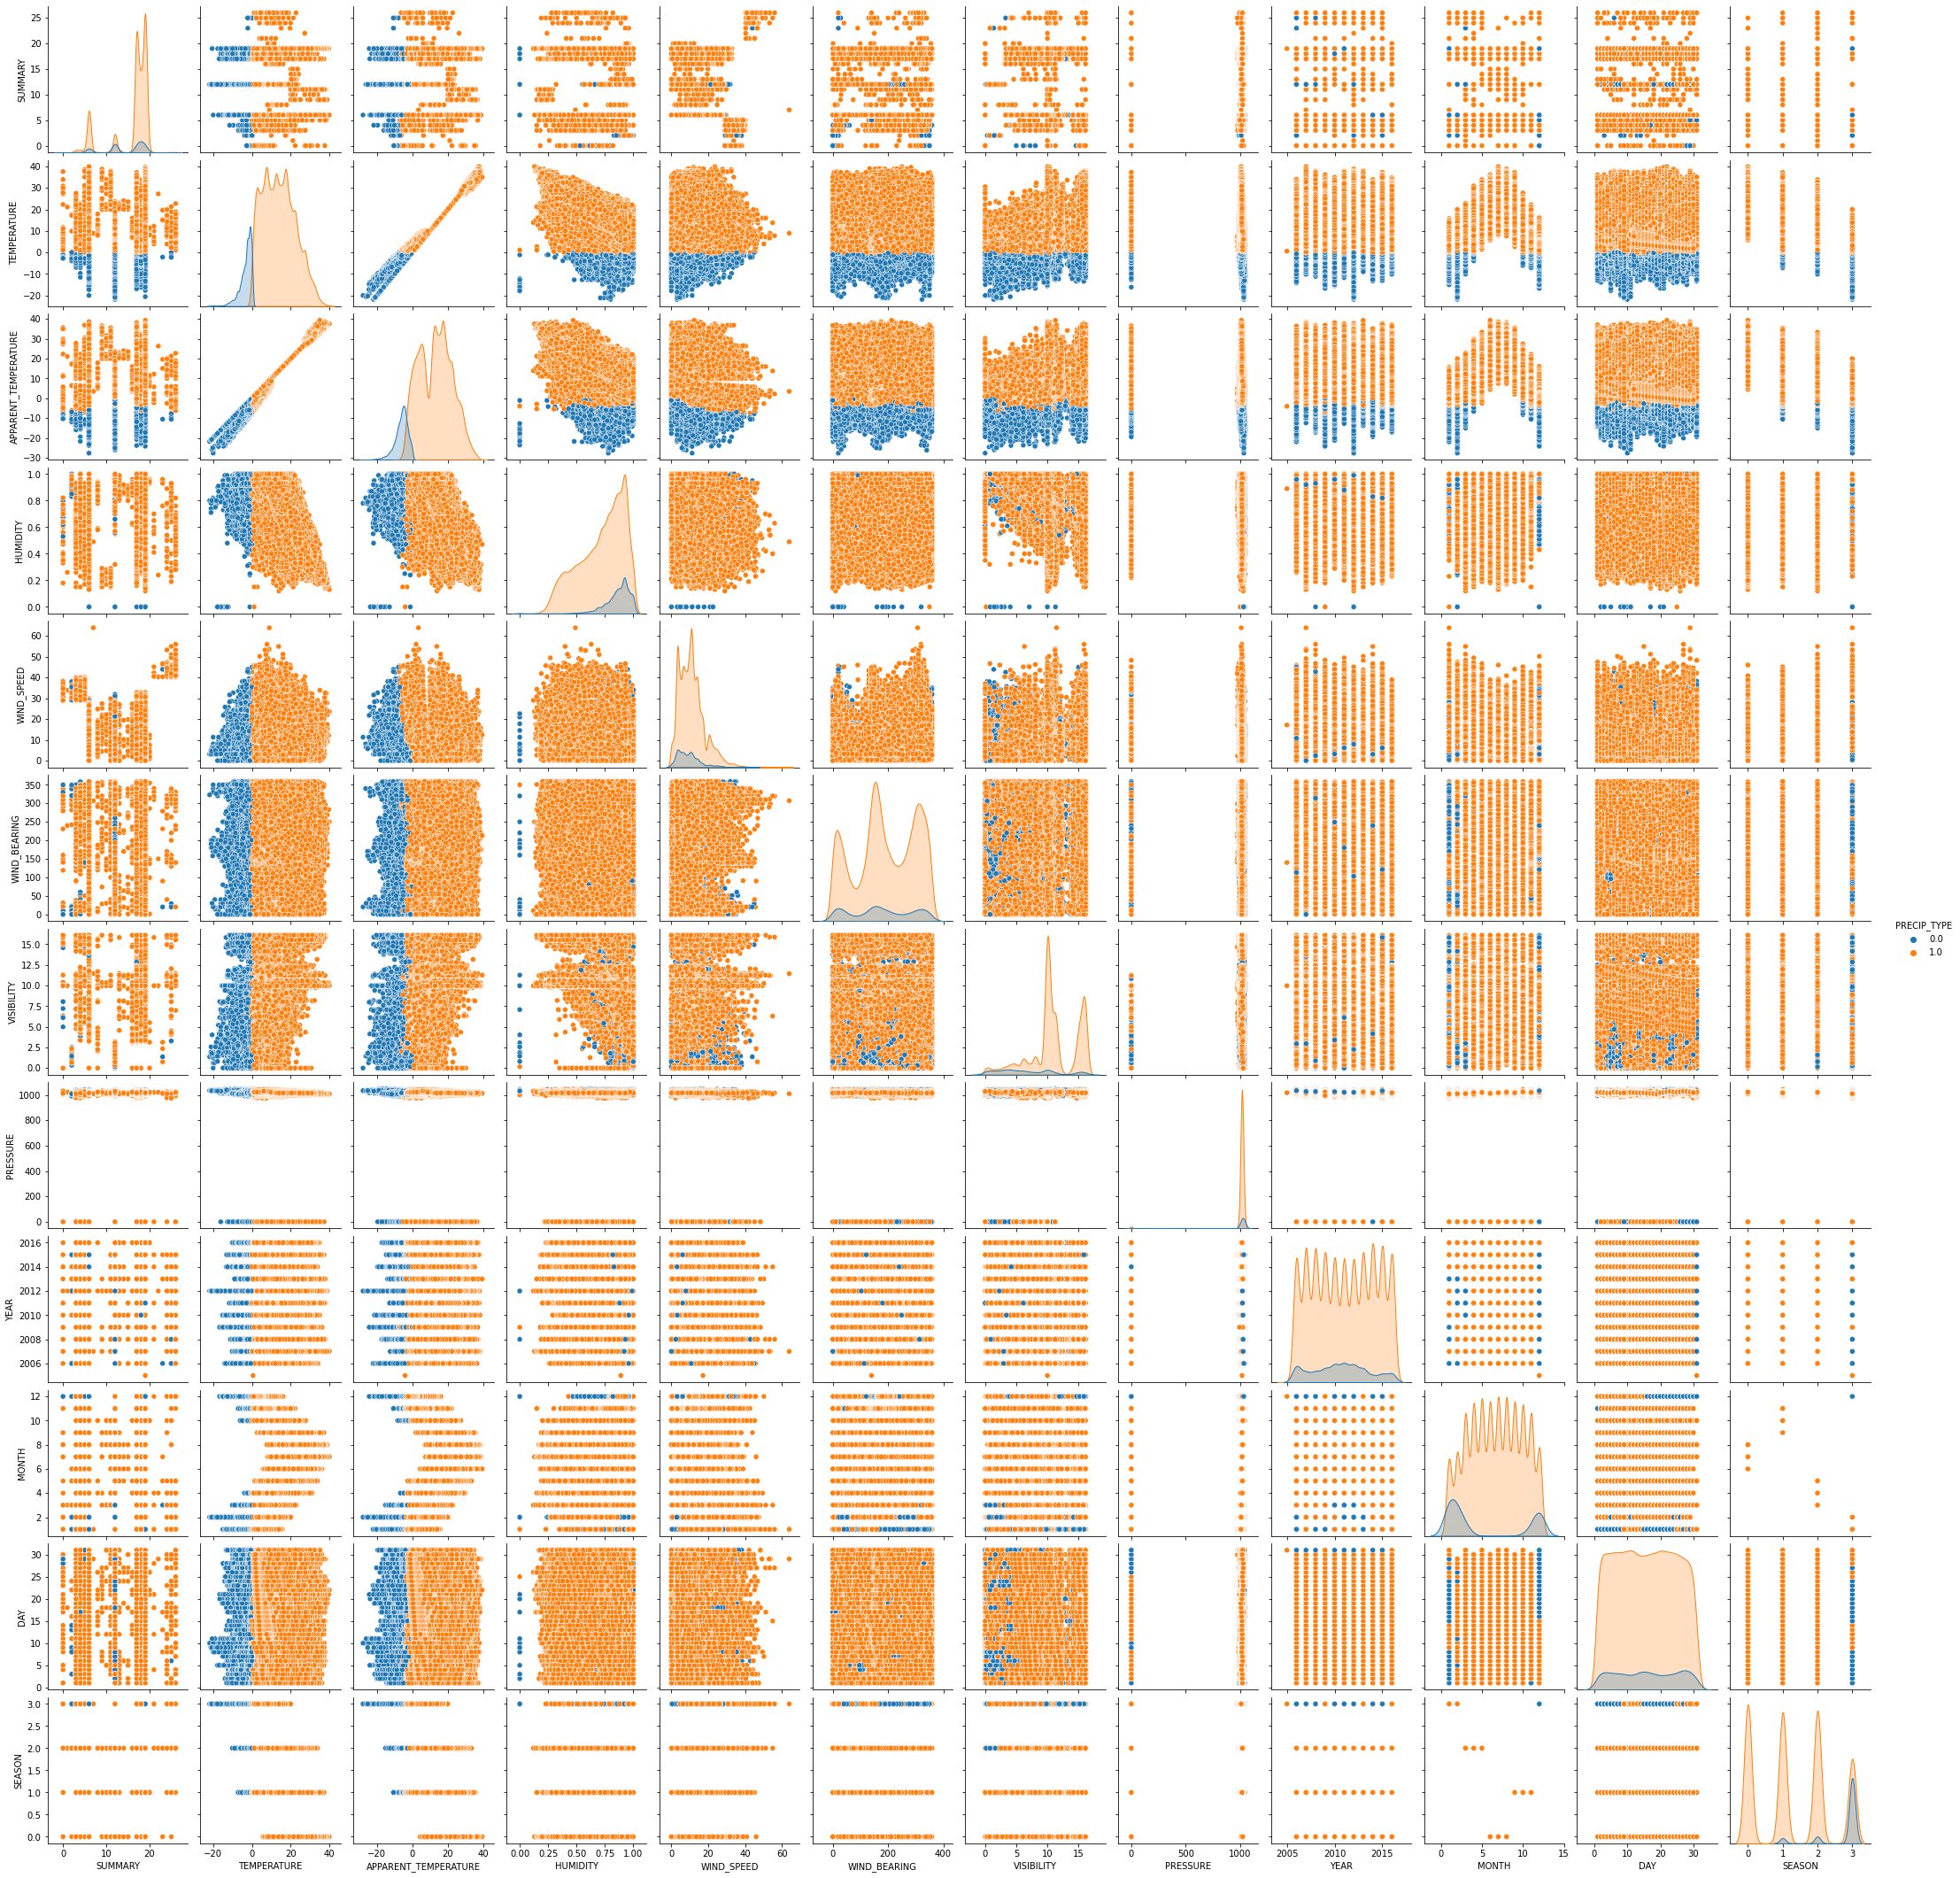

In [31]:
#weather1 = weather[:10000]
sns.pairplot(weather, hue='PRECIP_TYPE');

**The relationship between Features and PRECIP TYPE**

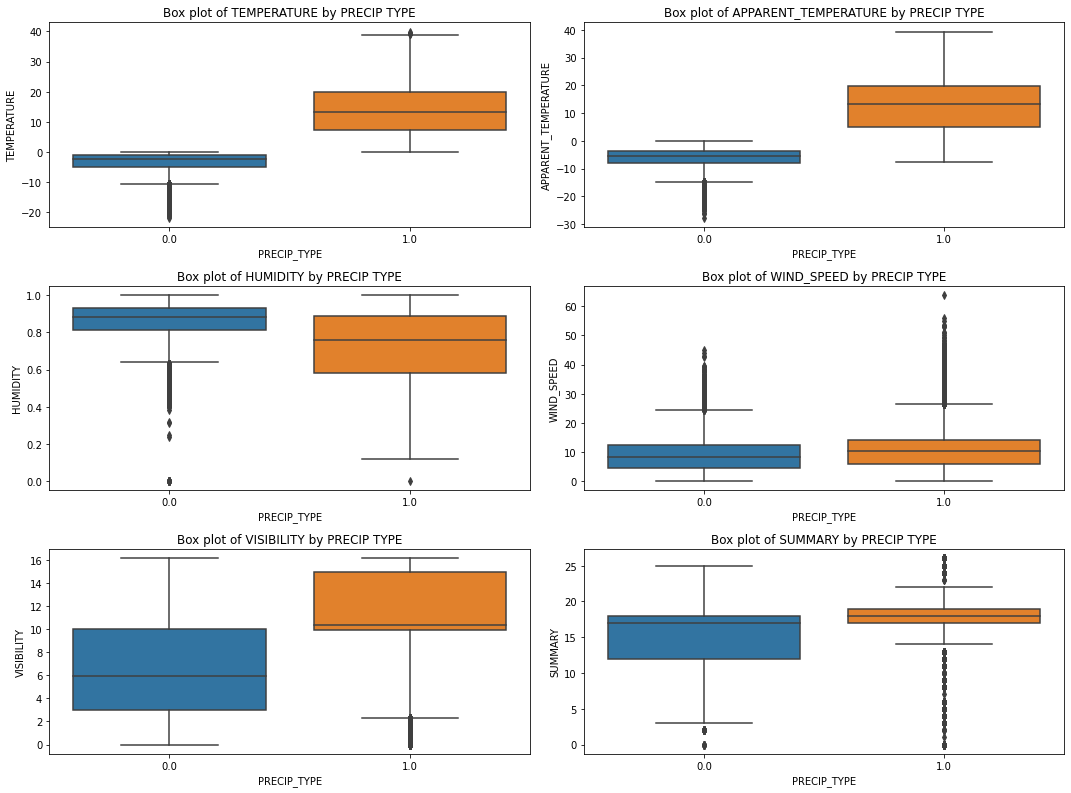

In [31]:
plt.figure(figsize=[15,18])
features = ['TEMPERATURE','APPARENT_TEMPERATURE','HUMIDITY','WIND_SPEED','VISIBILITY','SUMMARY']
counts=1
for f in features:
    plt.subplot(5,2,counts)
    sns.boxplot(x='PRECIP_TYPE', y=f, data=weather)
    plt.title("Box plot of {} by PRECIP TYPE".format(f))
    counts=counts+1
    
sns.color_palette(['#1f77b4', '#ff7f0e'])
plt.tight_layout()
plt.show()

In [32]:
#weather.drop(['index'], axis=1, inplace=True)

In [33]:
weather.corr()

SUMMARY  PRECIP_TYPE  TEMPERATURE  \
SUMMARY               1.000000     0.117006     0.146263   
PRECIP_TYPE           0.117006     1.000000     0.563533   
TEMPERATURE           0.146263     0.563533     1.000000   
APPARENT_TEMPERATURE  0.142401     0.566085     0.992634   
HUMIDITY             -0.112691    -0.232658    -0.632224   
WIND_SPEED            0.002712     0.067876     0.008659   
WIND_BEARING          0.023324     0.042112     0.029837   
VISIBILITY            0.135781     0.316487     0.393813   
PRESSURE              0.144559    -0.009281    -0.005286   
YEAR                  0.060003     0.044092     0.019494   
MONTH                -0.027593     0.145750     0.150382   
DAY                  -0.014690    -0.010700    -0.000011   
SEASON               -0.051845    -0.405197    -0.716357   

                      APPARENT_TEMPERATURE  HUMIDITY  WIND_SPEED  \
SUMMARY                           0.142401 -0.112691    0.002712   
PRECIP_TYPE                       0.566085 -0.232658    0.067876   
TEMPERATURE                       0.992634 -0.632224    0.008659   
APPARENT_TEMPERATURE              1.000000 -0.602460   -0.057061   
HUMIDITY                         -0.602460  1.000000   -0.224697   
WIND_SPEED                       -0.057061 -0.224697    1.000000   
WIND_BEARING                      0.028846  0.000769    0.104484   
VISIBILITY                        0.382675 -0.370621    0.100847   
PRESSURE                         -0.000069  0.005377   -0.049434   
YEAR                              0.019032  0.038441   -0.005190   
MONTH                             0.159780  0.055682   -0.099394   
DAY                               0.002510  0.005002   -0.008240   
SEASON                           -0.724350  0.281606    0.136717   

                      WIND_BEARING  VISIBILITY  PRESSURE      YEAR     MONTH  \
SUMMARY                   0.023324    0.135781  0.144559  0.060003 -0.027593   
PRECIP_TYPE               0.042112    0.316487 -0.009281  0.044092  0.145750   
TEMPERATURE               0.029837    0.393813 -0.005286  0.019494  0.150382   
APPARENT_TEMPERATURE      0.028846    0.382675 -0.000069  0.019032  0.159780   
HUMIDITY                  0.000769   -0.370621  0.005377  0.038441  0.055682   
WIND_SPEED                0.104484    0.100847 -0.049434 -0.005190 -0.099394   
WIND_BEARING              1.000000    0.048888 -0.011643 -0.025501 -0.019069   
VISIBILITY                0.048888    1.000000  0.061009  0.114941 -0.068040   
PRESSURE                 -0.011643    0.061009  1.000000  0.015119 -0.020046   
YEAR                     -0.025501    0.114941  0.015119  1.000000 -0.006507   
MONTH                    -0.019069   -0.068040 -0.020046 -0.006507  1.000000   
DAY                      -0.003371   -0.023501 -0.015995 -0.003401  0.008714   
SEASON                   -0.045346   -0.315406 -0.015936  0.002833 -0.379475   

                           DAY    SEASON  
SUMMARY              -0.014690 -0.051845  
PRECIP_TYPE          -0.010700 -0.405197  
TEMPERATURE          -0.000011 -0.716357  
APPARENT_TEMPERATURE  0.002510 -0.724350  
HUMIDITY              0.005002  0.281606  
WIND_SPEED           -0.008240  0.136717  
WIND_BEARING         -0.003371 -0.045346  
VISIBILITY           -0.023501 -0.315406  
PRESSURE             -0.015995 -0.015936  
YEAR                 -0.003401  0.002833  
MONTH                 0.008714 -0.379475  
DAY                   1.000000 -0.007277  
SEASON               -0.007277  1.000000

<Figure size 1800x1080 with 0 Axes>

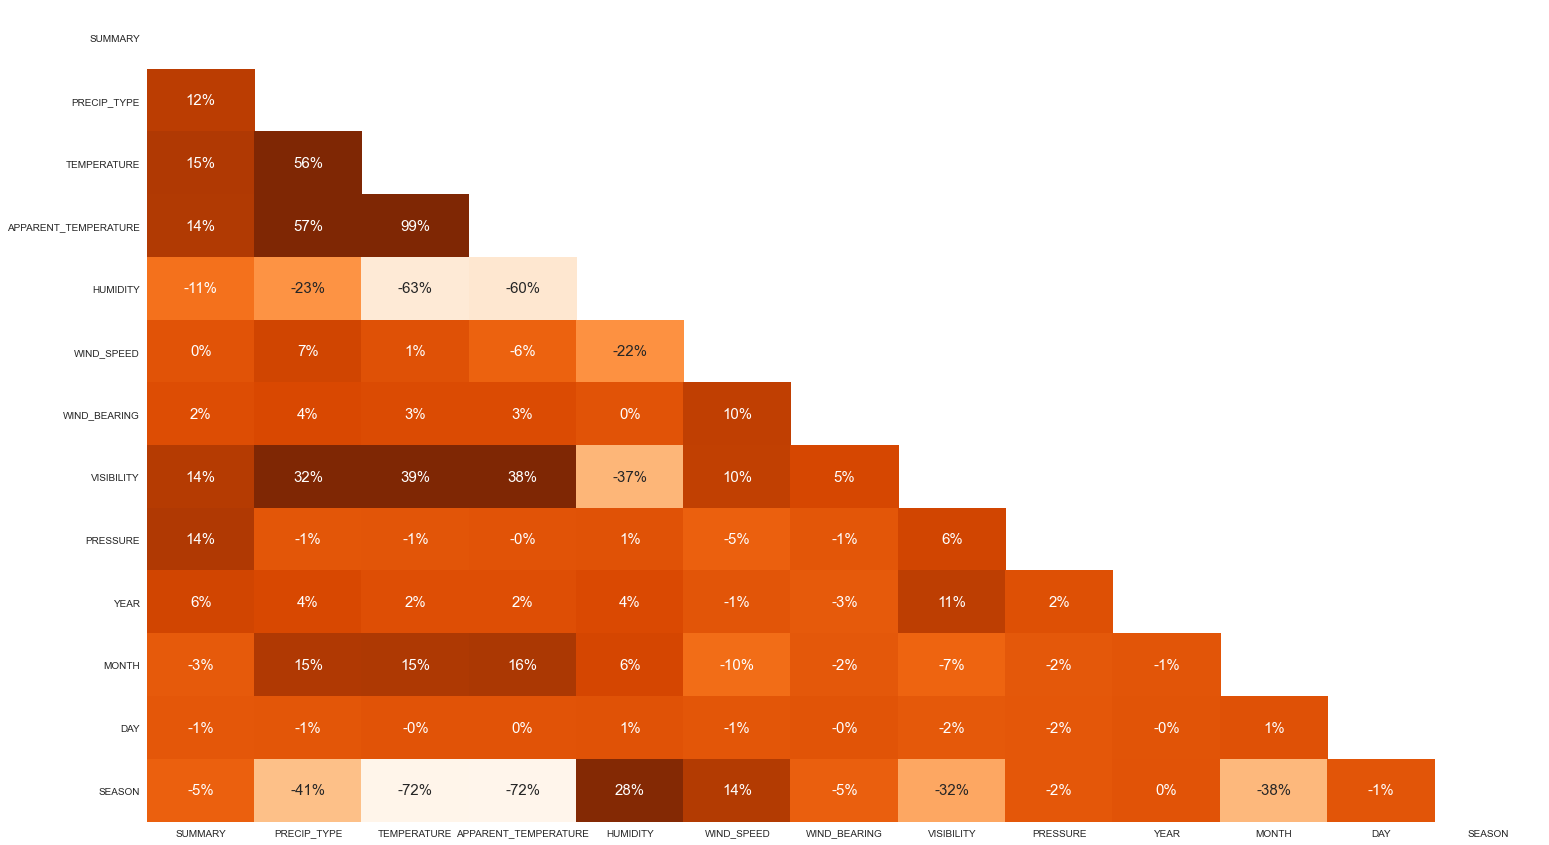

In [34]:
plt.figure(figsize=(25,15))

with sns.axes_style("white"):
    table = weather.corr()
    mask = np.zeros_like(table)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=(25,15))
    sns.heatmap(table, cmap='Oranges', mask=mask, vmax=.3, linewidths=0, annot=True,annot_kws={"size": 15},fmt='.0%',cbar=False,
                square=False)
    plt.savefig("heatmapforWeather1.png",transparent=True,  bbox_inches="tight")
    plt.show()

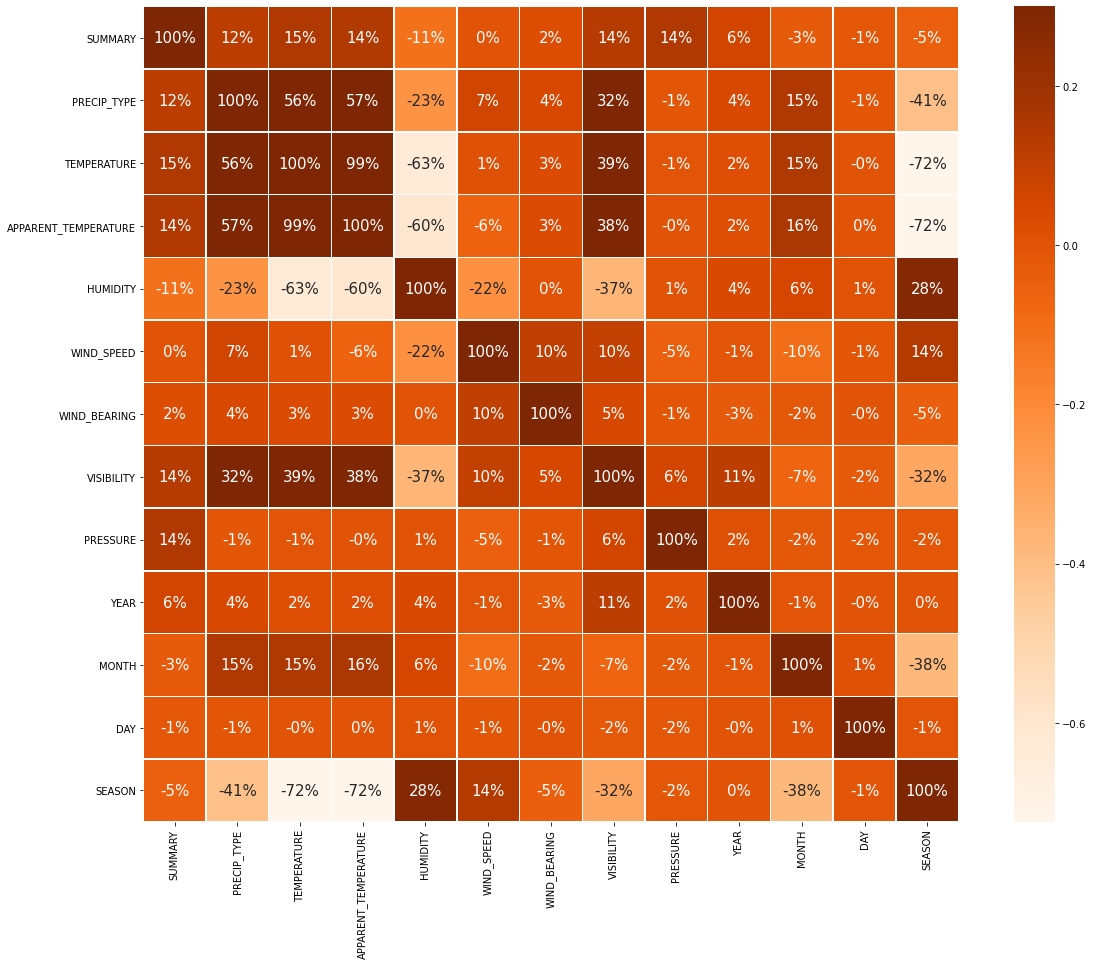

In [35]:
plt.figure(figsize=(20,15))
sns.heatmap(data=weather.corr(), cmap='Oranges', vmax=.3, linewidths=0.5, annot=True, annot_kws={"size": 15},fmt='.0%', square=True)
plt.savefig("heatmapforWeather.png")
plt.show()

**After some visualization we can conclude that**:

**In the box plot**, tell us that there is a relationship between features and our target.\
**In the correlation map**, theres is a high correlation between target and both TEMPERATURE and APPARENT_TEMPERATURE.

____

### feature importances

selected feature useing feature importances

<ipython-input-36-98ee6a1d1af4>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selection.fit(X,y)


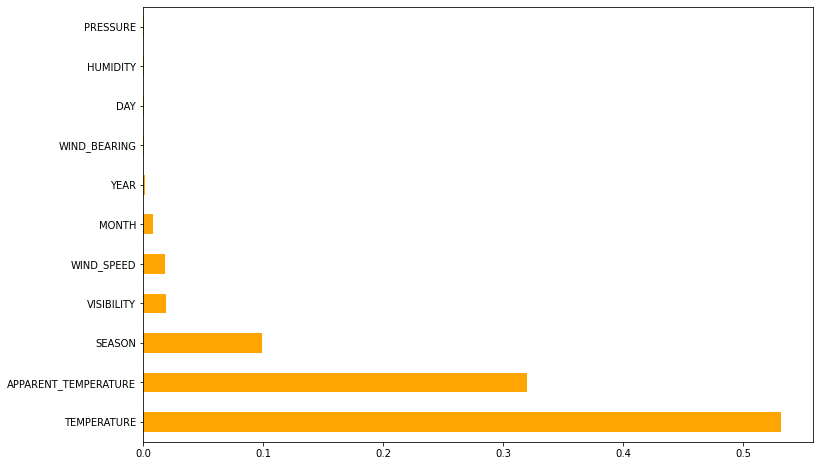

In [36]:
X = weather[['TEMPERATURE' , 'APPARENT_TEMPERATURE','HUMIDITY','WIND_SPEED','WIND_BEARING','PRESSURE','YEAR','MONTH','DAY','VISIBILITY','SEASON']]
y = weather[['PRECIP_TYPE']]

selection =ExtraTreesRegressor()
selection.fit(X,y)
selection.feature_importances_

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_,index = X.columns)
feat_importances.nlargest(20).plot(kind="barh",color="orange")
plt.savefig("featureimportances.png")
plt.show()


## Splitting the data and Handling Data Imbalanced

## Baseline Models

In [37]:
features=['TEMPERATURE' , 'APPARENT_TEMPERATURE','HUMIDITY','WIND_SPEED','WIND_BEARING','PRESSURE','YEAR','MONTH','DAY','VISIBILITY']
X =weather[features]
y= weather['PRECIP_TYPE']
y=y.astype('float')
X=X.astype('float')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.01, random_state=1)


#### Scaling using Standard Scaler

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [39]:
lm_model = LogisticRegression()
lm_model.fit(X_train,y_train)
accuracy_train_bes = lm_model.score(X_train, y_train)  #get accuracy on train set
accuracy_valid_bes = lm_model.score(X_val, y_val)  #get accuracy on valid set
accuracy_test_bes = lm_model.score(X_test, y_test)  #get accuracy on test set


print("Logistic Regression Model, Accuracy (Train Set) : ", accuracy_train_bes)
print("Logistic Regression Model, Accuracy (Val Set) : ", accuracy_valid_bes)
print("Logistic Regression Model, Accuracy (test Set) : ", accuracy_test_bes)
print('\n')

lm_pred =lm_model.predict(X_val)
precision = metrics.precision_score(y_val, lm_pred)
recall = metrics.recall_score(y_val, lm_pred)
f1 = metrics.f1_score(y_val, lm_pred)
print("Logistic Regression:, precision",precision)
print("Logistic Regression:, recall",recall)
print("Logistic Regression:, f1",f1)
print("AUC score :",metrics.roc_auc_score(y_val, lm_pred, average=None))

Logistic Regression Model, Accuracy (Train Set) :  0.9898831939745962
Logistic Regression Model, Accuracy (Val Set) :  0.9926315789473684
Logistic Regression Model, Accuracy (test Set) :  0.9927083333333333


Logistic Regression:, precision 0.9963369963369964
Logistic Regression:, recall 0.9951219512195122
Logistic Regression:, f1 0.9957291031116535
AUC score : 0.9860225140712946


/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Deal with outliers

In [40]:
weather = weather[(np.abs(stats.zscore(weather[['PRECIP_TYPE','SEASON','TEMPERATURE' , 'APPARENT_TEMPERATURE','HUMIDITY','WIND_SPEED','WIND_BEARING','PRESSURE','YEAR','MONTH','DAY','VISIBILITY']])) < 3).all(axis=1)].reset_index()


## Handling Data Imbalanced

In [41]:
weather['PRECIP_TYPE'].value_counts()

1.0    83010
0.0    10367
Name: PRECIP_TYPE, dtype: int64

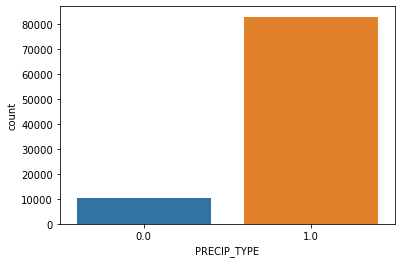

In [42]:
sns.countplot(x =weather["PRECIP_TYPE"])
plt.savefig("Imbalanced.png")
plt.show()

In [43]:
counts = weather.PRECIP_TYPE.value_counts()
snow = counts[0]
rain = counts[1]
prec_snow = (snow/(snow+rain))*100
prec_rain = (rain/(snow+rain))*100
print('There were {} snow ({:.3f}%) and {} rain ({:.3f}%).'.format(snow,prec_snow, rain, prec_rain))

There were 10367 snow (11.102%) and 83010 rain (88.898%).


> ### Our dataset is imbalanced. Therefore, SMOTE is used to solve it.

___

In [44]:
features=['TEMPERATURE' , 'APPARENT_TEMPERATURE','WIND_SPEED','PRESSURE','YEAR','MONTH','VISIBILITY','SEASON']
X =weather[features]
y=weather['PRECIP_TYPE']
y=y.astype('int')

In [45]:
#---- split the dataset

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.01,
                                                    random_state = 42, 
                                                    stratify = y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.01, random_state=42)

In [46]:
#---- SMOTE technique 

smt = SMOTE(random_state= 123)
X_train_smote, y_train_smote = smt.fit_resample(X, y) 
pd.value_counts(y_train_smote)

0    83010
1    83010
Name: PRECIP_TYPE, dtype: int64

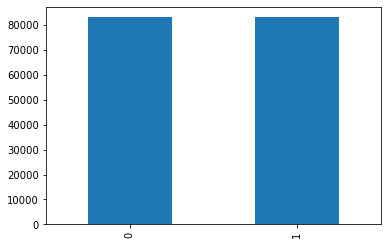

In [47]:
pd.value_counts(y_train_smote).plot.bar();

### ADA

In [48]:
ada = ADASYN()
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)
pd.value_counts(y_train_ada)

1    81348
0    81040
Name: PRECIP_TYPE, dtype: int64

### Random Over Sampler

In [50]:
over_sample = RandomOverSampler(sampling_strategy='all')
X_train_over, y_train_over = over_sample.fit_resample(X_train, y_train)
y_train_over=pd.Series(y_train_over)
y_train_over.value_counts()

0    81348
1    81348
Name: PRECIP_TYPE, dtype: int64

___

## Data Modling

### **1.Logistic Regression**

Logistic Regression Model
Logistic Regression Model, Accuracy (Train Set) :  0.9955728225514998
Logistic Regression Model, Accuracy (Val Set)   :  0.9935135135135135
Logistic Regression Model, Accuracy (test Set)  :  0.9892933618843683


precision : 1.0
recall    : 0.9927884615384616
f1        : 0.9963811821471652
AUC score : 0.9963942307692308


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        93
           1       1.00      0.99      1.00       832

    accuracy                           0.99       925
   macro avg       0.97      1.00      0.98       925
weighted avg       0.99      0.99      0.99       925



/Users/mada/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


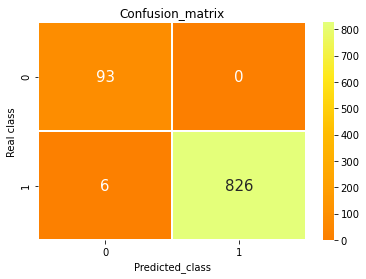

_________________________________________________________________________________


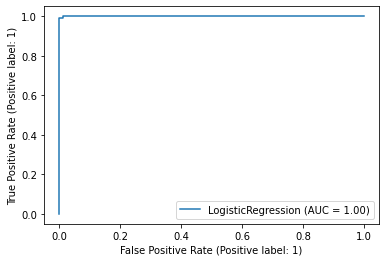

In [52]:
lr_model = LogisticRegression()
lr_model.fit(X_train_smote, y_train_smote)
lr_pred  = lr_model.predict(X_val)
accuracy_train_lr = lr_model.score(X_train_smote, y_train_smote)  #get accuracy on train set
accuracy_valid_lr = lr_model.score(X_val, y_val)  #get accuracy on valid set
accuracy_test_lr = lr_model.score(X_test, y_test)  #get accuracy on test set
print('Logistic Regression Model')
print("Logistic Regression Model, Accuracy (Train Set) : ", accuracy_train_lr)
print("Logistic Regression Model, Accuracy (Val Set)   : " , accuracy_valid_lr)
print("Logistic Regression Model, Accuracy (test Set)  : ", accuracy_test_lr)
print('\n')
print("precision :",precision_score(y_val,lr_pred))
print("recall    :",recall_score(y_val,lr_pred))
print("f1        :",f1_score(y_val,lr_pred))
print("AUC score :",metrics.roc_auc_score(y_val, lr_pred, average=None))
print('\n')
print(classification_report(y_val,lr_pred))

cnf_matrix = confusion_matrix(y_val, lr_pred)
sns.heatmap(cnf_matrix,cmap="Wistia_r", annot_kws={"size": 15},annot=True,linewidths=0.5, fmt='g')
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()
print('_________________________________________________________________________________')
metrics.plot_roc_curve(lr_model, X_val, y_val)

#### **2. KNN (k- Nearest Neighbors) Classifier**

In [52]:
# Create a new KNN model
knn1 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}
KNN_gscv = GridSearchCV(knn1, param_grid, cv=5)

KNN_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [53]:
KNN_gscv.best_params_

{'n_neighbors': 24}

> **After using KNN cross validation we found out "24" is the best n_neighbors**



KNeighborsClassifier Model
KNeighborsClassifier Model, Accuracy (Train Set) :  0.9866943741717865
KNeighborsClassifier Model, Accuracy (Val Set)   :  0.9751351351351352
KNeighborsClassifier Model, Accuracy (test Set)  :  0.9753747323340471


precision : 1.0
recall    : 0.9723557692307693
f1        : 0.9859841560024376
AUC score : 0.9861778846153846


              precision    recall  f1-score   support

           0       0.80      1.00      0.89        93
           1       1.00      0.97      0.99       832

    accuracy                           0.98       925
   macro avg       0.90      0.99      0.94       925
weighted avg       0.98      0.98      0.98       925



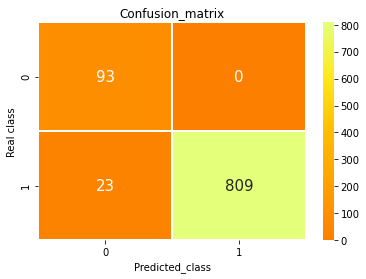

_________________________________________________________________________________


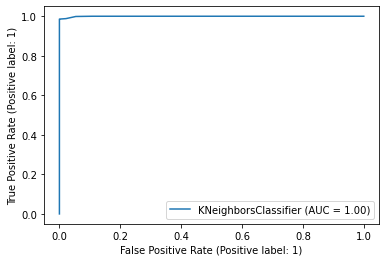

In [53]:
print('\n')
knn = KNeighborsClassifier(n_neighbors = 24)
knn.fit(X_train_smote, y_train_smote)
knn_pred = knn.predict(X_val)
accuracy_train_knn = knn.score(X_train_smote, y_train_smote)  #get accuracy on train set
accuracy_valid_knn = knn.score(X_val, y_val)  #get accuracy on valid set
accuracy_test_knn = knn.score(X_test, y_test)  #get accuracy on test set
print("KNeighborsClassifier Model")
print("KNeighborsClassifier Model, Accuracy (Train Set) : ", accuracy_train_knn)
print("KNeighborsClassifier Model, Accuracy (Val Set)   : ", accuracy_valid_knn)
print("KNeighborsClassifier Model, Accuracy (test Set)  : ", accuracy_test_knn)
print('\n')
print("precision :",precision_score(y_val,knn_pred))
print("recall    :",recall_score(y_val,knn_pred))
print("f1        :",f1_score(y_val,knn_pred))
print("AUC score :",metrics.roc_auc_score(y_val, knn_pred, average=None))
print('\n')
print(classification_report(y_val,knn_pred))

cnf_matrix = confusion_matrix(y_val, knn_pred)
sns.heatmap(cnf_matrix,cmap="Wistia_r", annot_kws={"size": 15},annot=True,linewidths=0.5, fmt='g')
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()
print('_________________________________________________________________________________')
metrics.plot_roc_curve(knn , X_val, y_val)

### **3.Gaussian Naive Bayes Classifier**

Gaussian Naive Bayes
Gaussian Naive Bayes, Accuracy (Train Set) :  0.9436453439344658
Gaussian Naive Bayes, Accuracy (Val Set)   :  0.8994594594594595
Gaussian Naive Bayes, Accuracy (test Set)  :  0.9154175588865097


precision : 0.9973082099596231
recall    : 0.890625
f1        : 0.940952380952381
AUC score : 0.934559811827957


              precision    recall  f1-score   support

           0       0.50      0.98      0.66        93
           1       1.00      0.89      0.94       832

    accuracy                           0.90       925
   macro avg       0.75      0.93      0.80       925
weighted avg       0.95      0.90      0.91       925



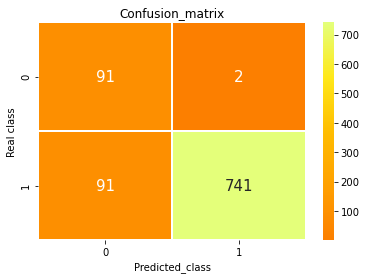

_________________________________________________________________________________


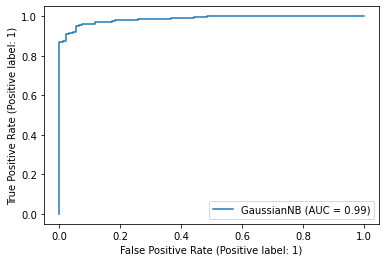

In [54]:
gnb = GaussianNB()
gnb.fit(X_train_smote, y_train_smote)
gnb_pred = gnb.predict(X_val)
accuracy_train_gnb = gnb.score(X_train_smote, y_train_smote)  #get accuracy on train set
accuracy_valid_gnb = gnb.score(X_val, y_val)  #get accuracy on valid set
accuracy_test_gnb = gnb.score(X_test, y_test)  #get accuracy on test set
print("Gaussian Naive Bayes")
print("Gaussian Naive Bayes, Accuracy (Train Set) : ", accuracy_train_gnb)
print("Gaussian Naive Bayes, Accuracy (Val Set)   : ", accuracy_valid_gnb)
print("Gaussian Naive Bayes, Accuracy (test Set)  : ", accuracy_test_gnb)
print('\n')
print("precision :",precision_score(y_val,gnb_pred))
print("recall    :",recall_score(y_val,gnb_pred))
print("f1        :",f1_score(y_val,gnb_pred))
print("AUC score :",metrics.roc_auc_score(y_val, gnb_pred, average=None))
print('\n')
print(classification_report(y_val,gnb_pred))

cnf_matrix = confusion_matrix(y_val, gnb_pred)
sns.heatmap(cnf_matrix,cmap="Wistia_r", annot_kws={"size": 15},annot=True,linewidths=0.5, fmt='g')
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()
print('_________________________________________________________________________________')
metrics.plot_roc_curve(gnb, X_val, y_val)

### **4.Support Vector Machine (SVM)**

Support Vector Machine
Support Vector Machine, Accuracy (Train Set) :  0.9361582941814239
Support Vector Machine, Accuracy (Val Set) :  0.8767567567567568
Support Vector Machine, Accuracy (test Set) :  0.8918629550321199


precision : 1.0
recall    : 0.8629807692307693
f1        : 0.9264516129032259
AUC score : 0.9314903846153846


              precision    recall  f1-score   support

           0       0.45      1.00      0.62        93
           1       1.00      0.86      0.93       832

    accuracy                           0.88       925
   macro avg       0.72      0.93      0.77       925
weighted avg       0.94      0.88      0.90       925



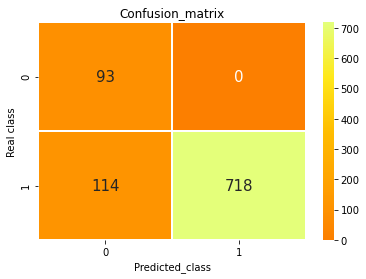

_________________________________________________________________________________


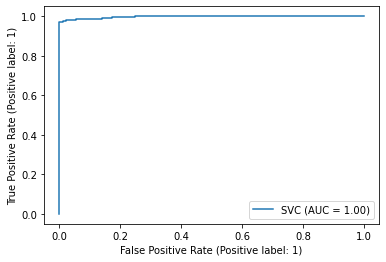

In [58]:
svm = SVC()
svm.fit(X_train_smote, y_train_smote)
svm_pred = svm.predict(X_val)
accuracy_train_svc = svm.score(X_train_smote, y_train_smote)  #get accuracy on train set
accuracy_valid_svc = svm.score(X_val, y_val)  #get accuracy on valid set
accuracy_test_svc = svm.score(X_test, y_test)  #get accuracy on test set
print("Support Vector Machine")
print("Support Vector Machine, Accuracy (Train Set) : ", accuracy_train_svc)
print("Support Vector Machine, Accuracy (Val Set) : ", accuracy_valid_svc)
print("Support Vector Machine, Accuracy (test Set) : ", accuracy_test_svc)
print('\n')
print("precision :",precision_score(y_val,svm_pred))
print("recall    :",recall_score(y_val,svm_pred))
print("f1        :",f1_score(y_val,svm_pred))
print("AUC score :",metrics.roc_auc_score(y_val, svm_pred, average=None))
print('\n')
print(classification_report(y_val,svm_pred))

cnf_matrix = confusion_matrix(y_val, svm_pred)
sns.heatmap(cnf_matrix,cmap="Wistia_r", annot_kws={"size": 15},annot=True,linewidths=0.5, fmt='g')
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()
print('_________________________________________________________________________________')
metrics.plot_roc_curve(svm, X_val, y_val)

### **5.Decision Tree**

Decision Tree
Decision Tree, Accuracy (Train Set) :  1.0
Decision Tree, Accuracy (Val Set) :  1.0
Decision Tree, Accuracy (test Set) :  1.0


precision : 1.0
recall    : 1.0
f1        : 1.0
AUC score : 1.0


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       102
         1.0       1.00      1.00      1.00       823

    accuracy                           1.00       925
   macro avg       1.00      1.00      1.00       925
weighted avg       1.00      1.00      1.00       925



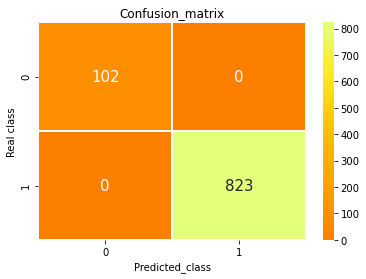

_________________________________________________________________________________


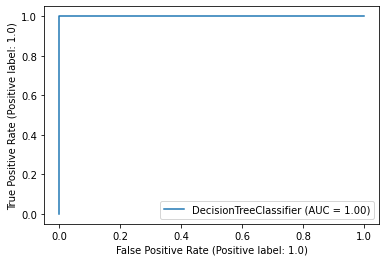

In [83]:
tree = DecisionTreeClassifier()
tree.fit(X_train_smote, y_train_smote)
tree_pred = tree.predict(X_val)
accuracy_train_tree = tree.score(X_train_smote, y_train_smote)  #get accuracy on train set
accuracy_valid_tree = tree.score(X_val, y_val)  #get accuracy on valid set
accuracy_test_tree = tree.score(X_test, y_test)  #get accuracy on test set
print("Decision Tree")
print("Decision Tree, Accuracy (Train Set) : ", accuracy_train_tree)
print("Decision Tree, Accuracy (Val Set) : ", accuracy_valid_tree)
print("Decision Tree, Accuracy (test Set) : ", accuracy_test_tree)
print('\n')
print("precision :",precision_score(y_val,tree_pred))
print("recall    :",recall_score(y_val,tree_pred))
print("f1        :",f1_score(y_val,tree_pred))
print("AUC score :",metrics.roc_auc_score(y_val, tree_pred, average=None))
print('\n')
print(classification_report(y_val,tree_pred))

cnf_matrix = confusion_matrix(y_val, tree_pred)
sns.heatmap(cnf_matrix,cmap="Wistia_r", annot_kws={"size": 15},annot=True,linewidths=0.5, fmt='g')
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.savefig("DecisionTree.png")
plt.show()
print('_________________________________________________________________________________')
metrics.plot_roc_curve(tree, X_val, y_val)
plt.savefig("DecisionTree1.png")

### **6.Random Forest**

In [60]:
rf_2 = RandomForestClassifier()
param_grid = {'n_estimators': np.arange(1, 100)}
rf_gscv = GridSearchCV(rf_2, param_grid, cv=5)

rf_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [61]:
rf_gscv.best_params_

{'n_estimators': 7}

> ### After using RandomForestClassifier cross validation we found out "7" is the best n_estimators

Random Forest
Random Forest, Accuracy (Train Set) :  1.0
Random Forest, Accuracy (Val Set) :  1.0
Random Forest, Accuracy (test Set) :  1.0


precision : 1.0
recall    : 1.0
f1        : 1.0
AUC score : 1.0


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       102
         1.0       1.00      1.00      1.00       823

    accuracy                           1.00       925
   macro avg       1.00      1.00      1.00       925
weighted avg       1.00      1.00      1.00       925



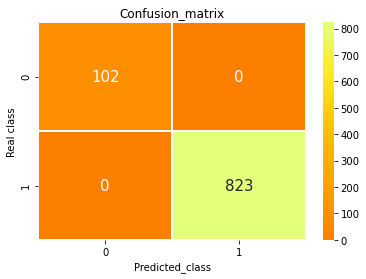

_________________________________________________________________________________


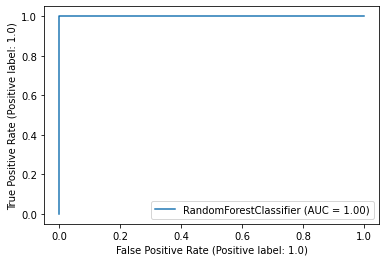

In [84]:
forest = RandomForestClassifier(n_estimators= 7)
forest.fit(X_train_smote, y_train_smote)
forest_pred = forest.predict(X_val)
accuracy_train_rf = forest.score(X_train_smote, y_train_smote)  #get accuracy on train set
accuracy_valid_rf = forest.score(X_val, y_val)  #get accuracy on valid set
accuracy_test_rf = forest.score(X_test, y_test)  #get accuracy on test set
print("Random Forest")
print("Random Forest, Accuracy (Train Set) : ", accuracy_train_rf)
print("Random Forest, Accuracy (Val Set) : ", accuracy_valid_rf)
print("Random Forest, Accuracy (test Set) : ", accuracy_test_rf)
print('\n')
print("precision :",precision_score(y_val,forest_pred))
print("recall    :",recall_score(y_val,forest_pred))
print("f1        :",f1_score(y_val,forest_pred))
print("AUC score :",metrics.roc_auc_score(y_val, forest_pred, average=None))
print('\n')
print(classification_report(y_val,forest_pred))

cnf_matrix = confusion_matrix(y_val, forest_pred)
sns.heatmap(cnf_matrix,cmap="Wistia_r", annot_kws={"size": 15},annot=True,linewidths=0.5, fmt='g')
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.savefig("RandomForest.png")
plt.show()
print('_________________________________________________________________________________')
metrics.plot_roc_curve(forest, X_val, y_val)

### **7.Gradient Boosting Classifier**

In [64]:
gb_2 = GradientBoostingClassifier()
param_grid = {'n_estimators': np.arange(1, 100)}
gb_gscv = GridSearchCV(gb_2, param_grid, cv=5)

gb_gscv.fit(X, y)

gb_gscv.best_params_

{'n_estimators': 5}

> ### After using GradientBoostingClassifier cross validation we found out "5" is the best n_estimators

XGBClassifier
xGBOOST, Accuracy (Train Set) :  1.0
xGBOOST, Accuracy (Val Set) :  1.0
xGBOOST, Accuracy (test Set) :  1.0


precision : 1.0
recall    : 1.0
f1        : 1.0
AUC score : 1.0


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       102
         1.0       1.00      1.00      1.00       823

    accuracy                           1.00       925
   macro avg       1.00      1.00      1.00       925
weighted avg       1.00      1.00      1.00       925



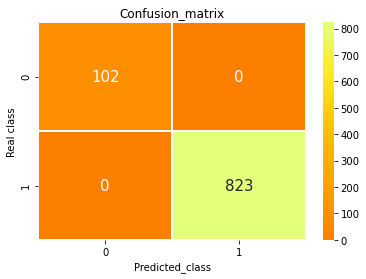

_________________________________________________________________________________


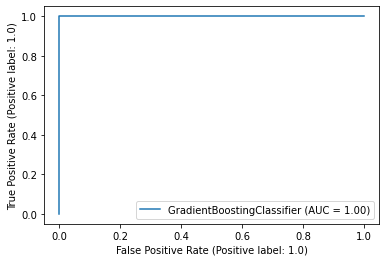

In [85]:
xg_model = GradientBoostingClassifier(n_estimators=5, 
                               max_depth=3,
                               learning_rate=.71)
xg_model.fit(X_train_smote, y_train_smote)
xg_pred = xg_model.predict(X_val)
accuracy_train_xg = xg_model.score(X_train_smote, y_train_smote)  #get accuracy on train set
accuracy_valid_xg = xg_model.score(X_val, y_val)  #get accuracy on valid set
accuracy_test_xg = xg_model.score(X_test, y_test)
print("XGBClassifier")
print("xGBOOST, Accuracy (Train Set) : ", accuracy_train_xg)
print("xGBOOST, Accuracy (Val Set) : ", accuracy_valid_xg)
print("xGBOOST, Accuracy (test Set) : ", accuracy_test_xg)
print('\n')
print("precision :",precision_score(y_val,xg_pred))
print("recall    :",recall_score(y_val,xg_pred))
print("f1        :",f1_score(y_val,xg_pred))
print("AUC score :",metrics.roc_auc_score(y_val, xg_pred, average=None))
print('\n')
print(classification_report(y_val,xg_pred))

cnf_matrix = confusion_matrix(y_val, xg_pred)
sns.heatmap(cnf_matrix,cmap="Wistia_r", annot_kws={"size": 15},annot=True,linewidths=0.5, fmt='g')
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.savefig("xGBOOST.png")
plt.show()
print('_________________________________________________________________________________')
metrics.plot_roc_curve(xg_model, X_val, y_val)




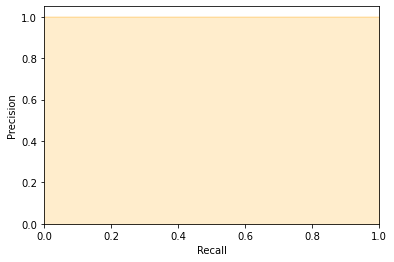

In [86]:

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_val,xg_pred)
plt.step(recall, precision, color='orange', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.savefig("recallprecision.png")
plt.show()

## Summary of models

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
models_list = [lr_model,
               knn,
               gnb,
               svm,
               tree,
               forest,
               xg_model
              ]

In [73]:
models = []
accuracies_tr = []
accuracies_va = []
accuracies_te = []

precisions = []
recalls = []
roc_scores = []
f1_scores = []

for model in models_list:
    
    if(model == models_list[-1]):
        count_vectorizer = CountVectorizer(ngram_range=(1, 2),  max_df = 0.6)
        features=['TEMPERATURE' , 'APPARENT_TEMPERATURE','WIND_SPEED','PRESSURE','YEAR','MONTH','VISIBILITY','SEASON']
        X =weather[features]
        y= weather['PRECIP_TYPE']
        
        
        #X, y = weather.drop('PRECIP_TYPE',axis=1), weather['PRECIP_TYPE']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=1)

        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.01, random_state=1)


    sm = SMOTE(random_state=123)
    X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
    pd.value_counts(y_train_smote)
     
    accuracy1 = model.score(X_train_smote, y_train_smote)  #get accuracy
    accuracy2 = model.score(X_val, y_val)  #get accuracy
    accuracy3 = model.score(X_test, y_test)  #get accuracy
    y_pred = model.predict(X_val) #get predictions
    model_name = type(model).__name__
    print("Accuracy for train("+ model_name + "): ", accuracy1.round(4)) #display accuracy
    print("Accuracy for validation("+ model_name + "): ", accuracy2.round(4)) #display accuracy
    print("Accuracy for Test("+ model_name + "): ", accuracy3.round(4)) #display accuracy


    print("F1 score("+ model_name + "): ", f1_score(y_val,y_pred).round(4)) #display F1
    print("Precision("+ model_name + "): ", precision_score(y_val,y_pred).round(4)) #display precision
    print("Recall("+ model_name + "): ",recall_score(y_val,y_pred).round(4)) #display recall
    print("ROC Score("+ model_name + "): ",roc_auc_score(y_val,y_pred).round(4)) #display recall
    print("\n")
    print('_________________________________________________________________________________')
    print("\n")
    models.append(model_name)
    accuracies_tr.append(accuracy1.round(4))
    accuracies_va.append(accuracy2.round(4))
    accuracies_te.append(accuracy3.round(4))

    f1_scores.append(f1_score(y_val,y_pred).round(4))
    precisions.append(precision_score(y_val,y_pred).round(4))
    recalls.append(recall_score(y_val,y_pred).round(4))
    roc_scores.append(roc_auc_score(y_val,y_pred).round(4))

Accuracy for train(LogisticRegression):  0.9955
Accuracy for validation(LogisticRegression):  0.9935
Accuracy for Test(LogisticRegression):  0.9893
F1 score(LogisticRegression):  0.9964
Precision(LogisticRegression):  1.0
Recall(LogisticRegression):  0.9928
ROC Score(LogisticRegression):  0.9964


_________________________________________________________________________________


Accuracy for train(KNeighborsClassifier):  0.9867
Accuracy for validation(KNeighborsClassifier):  0.9751
Accuracy for Test(KNeighborsClassifier):  0.9754
F1 score(KNeighborsClassifier):  0.986
Precision(KNeighborsClassifier):  1.0
Recall(KNeighborsClassifier):  0.9724
ROC Score(KNeighborsClassifier):  0.9862


_________________________________________________________________________________


Accuracy for train(GaussianNB):  0.9434
Accuracy for validation(GaussianNB):  0.8995
Accuracy for Test(GaussianNB):  0.9154
F1 score(GaussianNB):  0.941
Precision(GaussianNB):  0.9973
Recall(GaussianNB):  0.8906
ROC Score

In [74]:
results = pd.DataFrame({"Model" : models, "Accuracy for train" : accuracies_tr,"Accuracy for validation" : accuracies_va,"Accuracy for test" : accuracies_te,"F1" : f1_scores, "Precision" : precisions, "Recall" : recalls, 'ROC Score' :roc_scores})
results

Model  Accuracy for train  Accuracy for validation  \
0          LogisticRegression              0.9955                   0.9935   
1        KNeighborsClassifier              0.9867                   0.9751   
2                  GaussianNB              0.9434                   0.8995   
3                         SVC              0.9362                   0.8768   
4      DecisionTreeClassifier              1.0000                   1.0000   
5      RandomForestClassifier              1.0000                   1.0000   
6  GradientBoostingClassifier              1.0000                   1.0000   

   Accuracy for test      F1  Precision  Recall  ROC Score  
0             0.9893  0.9964     1.0000  0.9928     0.9964  
1             0.9754  0.9860     1.0000  0.9724     0.9862  
2             0.9154  0.9410     0.9973  0.8906     0.9346  
3             0.8919  0.9265     1.0000  0.8630     0.9315  
4             1.0000  1.0000     1.0000  1.0000     1.0000  
5             1.0000  1.0000     1.0000  1.0000     1.0000  
6             1.0000  1.0000     1.0000  1.0000     1.0000

In [75]:
results.set_index('Model', inplace=True)
results

Accuracy for train  Accuracy for validation  \
Model                                                                     
LogisticRegression                      0.9955                   0.9935   
KNeighborsClassifier                    0.9867                   0.9751   
GaussianNB                              0.9434                   0.8995   
SVC                                     0.9362                   0.8768   
DecisionTreeClassifier                  1.0000                   1.0000   
RandomForestClassifier                  1.0000                   1.0000   
GradientBoostingClassifier              1.0000                   1.0000   

                            Accuracy for test      F1  Precision  Recall  \
Model                                                                      
LogisticRegression                     0.9893  0.9964     1.0000  0.9928   
KNeighborsClassifier                   0.9754  0.9860     1.0000  0.9724   
GaussianNB                             0.9154  0.9410     0.9973  0.8906   
SVC                                    0.8919  0.9265     1.0000  0.8630   
DecisionTreeClassifier                 1.0000  1.0000     1.0000  1.0000   
RandomForestClassifier                 1.0000  1.0000     1.0000  1.0000   
GradientBoostingClassifier             1.0000  1.0000     1.0000  1.0000   

                            ROC Score  
Model                                  
LogisticRegression             0.9964  
KNeighborsClassifier           0.9862  
GaussianNB                     0.9346  
SVC                            0.9315  
DecisionTreeClassifier         1.0000  
RandomForestClassifier         1.0000  
GradientBoostingClassifier     1.0000

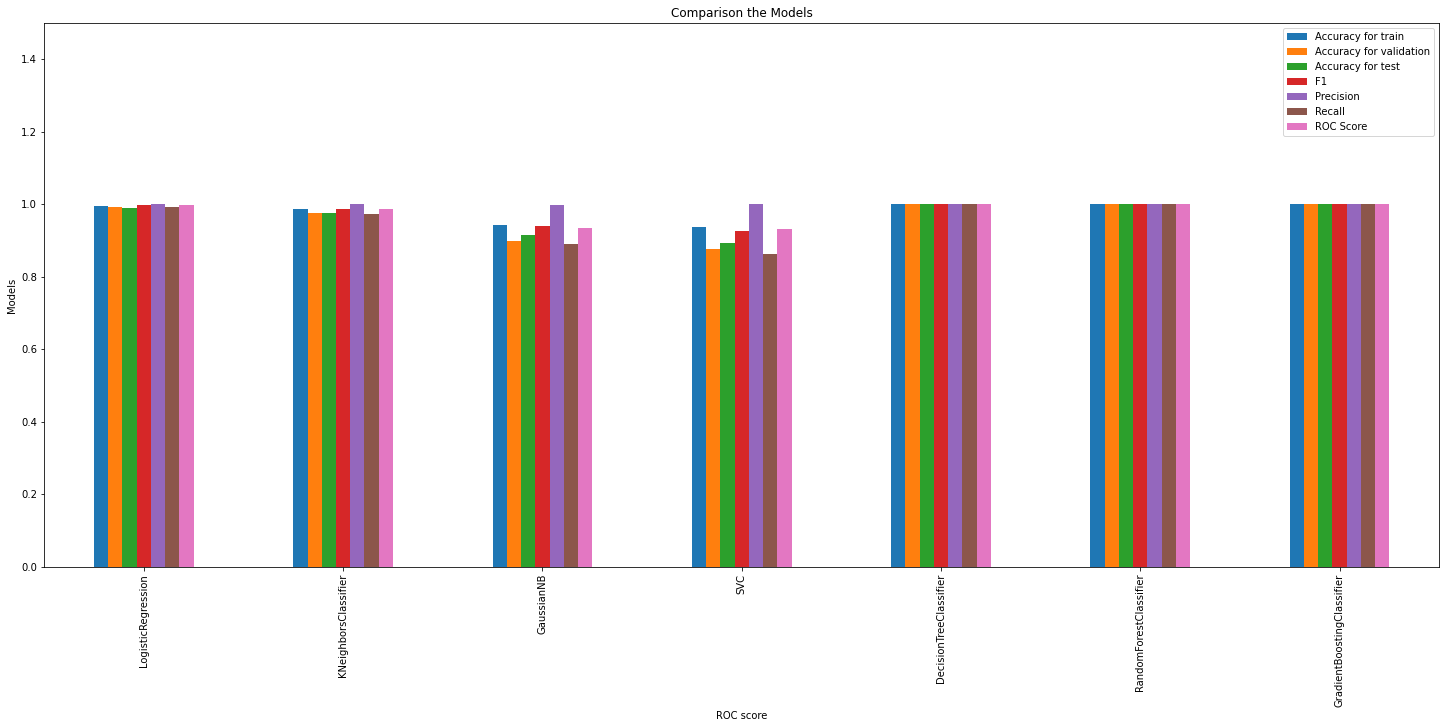

In [76]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

results.plot(kind = 'bar',figsize=(25,10))
plt.title("Comparison the Models")
plt.ylabel("Models")
plt.ylim(0, 1.5)
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel("ROC score")
plt.savefig("Comparison.png",transparent=True,  bbox_inches="tight")
plt.show();

## Compare Accuracy Results

In [77]:
# Save each Accuracy with its model name in a data frame
accuracies = pd.DataFrame()
accuracies['names'] = ['Baseline','Logistic Regression' , 'KNeighbors','GaussianNB','SVM','Decision Tree','Random Forest','XGBoost']
accuracies['values'] = [accuracy_valid_bes , accuracy_valid_lr , accuracy_valid_knn , accuracy_valid_gnb ,accuracy_valid_svc, accuracy_valid_tree, accuracy_valid_rf, accuracy_valid_xg]


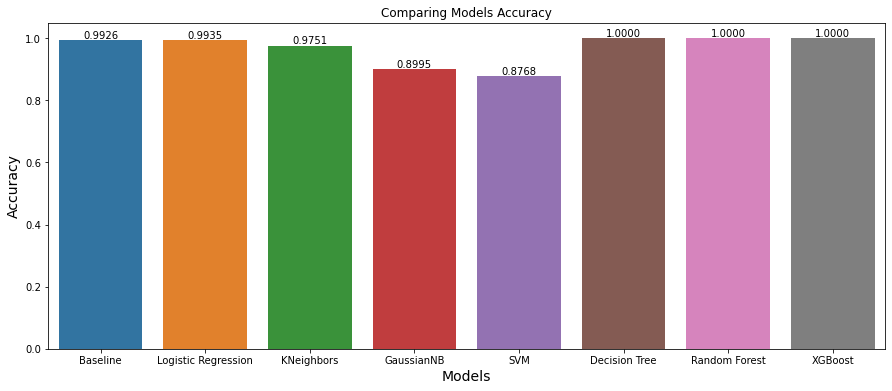

In [78]:
plt.figure(figsize=(15, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

splot=sns.barplot(x="names",y="values",data=accuracies)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.4f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 5), 
                   textcoords = 'offset points')
plt.xlabel("Models", size=14)
plt.ylabel("Accuracy", size=14)
plt.title('Comparing Models Accuracy');

## ROC Curve

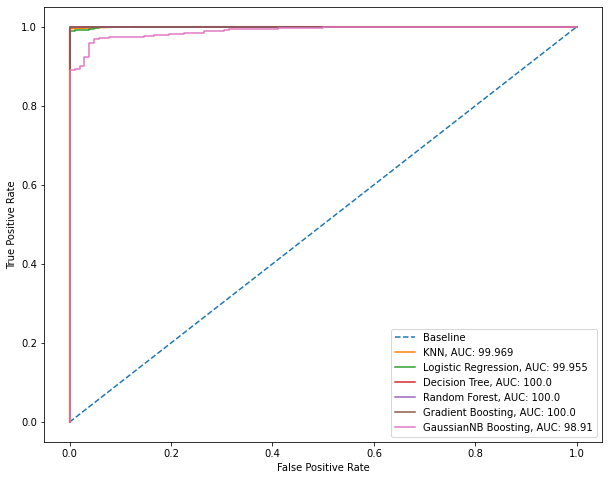

In [79]:
ig, ax = plt.subplots(figsize=(10,8))
# KNN
knn_probs = knn.predict_proba(X_val)[:, 1]
# LR
lr_probs = lr_model.predict_proba(X_val)[:, 1]
# svm
#svm_probs = svm.predict_proba(X_test)[:, 1]
# tree
dtree_probs = tree.predict_proba(X_val)[:, 1]
# RF
rf_probs = forest.predict_proba(X_val)[:, 1]
# Adaboosting
xg_probs = xg_model.predict_proba(X_val)[:, 1]
# GB
Gb_probs = gnb.predict_proba(X_val)[:, 1]

#svm_probs = svm.predict_proba(X_test,probability=True)[:, 1]

# plot baseline roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='Baseline')
# calculate roc curve for model
fpr1, tpr1, _ = roc_curve(y_val, knn_probs)
fpr2, tpr2, _ = roc_curve(y_val, lr_probs )
fpr3, tpr3, _ = roc_curve(y_val, dtree_probs)
fpr4, tpr4, _ = roc_curve(y_val, rf_probs )
fpr5, tpr5, _ = roc_curve(y_val, xg_probs)
fpr6, tpr6, _ = roc_curve(y_val, Gb_probs)
#fpr7, tpr7, _ = roc_curve(y_test, svm_probs)
auc1 = round(100*(roc_auc_score(y_val, knn_probs)), 3)
auc2 = round(100*(roc_auc_score(y_val,lr_probs)), 3)
auc3 = round(100*(roc_auc_score(y_val,dtree_probs)), 3)
auc4 = round(100*(roc_auc_score(y_val, rf_probs)), 3)
auc5 = round(100*(roc_auc_score(y_val, xg_probs)), 3)
auc6 = round(100*(roc_auc_score(y_val, Gb_probs)), 3)
#auc7 = round(100*(roc_auc_score(y_test, svm_probs)), 3)

# plot model roc curve
plt.plot(fpr1, tpr1, linestyle='-', label=f'KNN, AUC: {auc1}')
plt.plot(fpr2, tpr2, linestyle='-', label=f'Logistic Regression, AUC: {auc2}')
plt.plot(fpr3, tpr3, linestyle='-', label=f'Decision Tree, AUC: {auc3}')
plt.plot(fpr4, tpr4, linestyle='-', label=f'Random Forest, AUC: {auc4}')
plt.plot(fpr5, tpr5, linestyle='-', label=f'Gradient Boosting, AUC: {auc5}')
plt.plot(fpr6, tpr6, linestyle='-', label=f'GaussianNB Boosting, AUC: {auc6}')
#plt.plot(fpr7, tpr7, linestyle='-', label=f'SVM, AUC: {auc7}')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.savefig("ROC_Curve.png")
plt.show()

# Voting Classifier (validation)

/Users/mada/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


VotingClassifier
VotingClassifier, Accuracy (Train Set) :  1.0
VotingClassifier, Accuracy (Val Set) :  1.0
xVotingClassifier, Accuracy (test Set) :  1.0


precision : 1.0
recall    : 1.0
f1        : 1.0
AUC score : 1.0




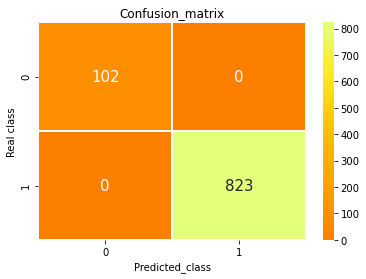

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       102
         1.0       1.00      1.00      1.00       823

    accuracy                           1.00       925
   macro avg       1.00      1.00      1.00       925
weighted avg       1.00      1.00      1.00       925



In [80]:
#import Voting Classifier

from sklearn.ensemble import VotingClassifier

#instantiating three classifiers

xg_model=XGBClassifier(verbosity=0)
tree = DecisionTreeClassifier()
forest = RandomForestClassifier(n_estimators= 7)

voting_clf = VotingClassifier(estimators=[('xgoots',xg_model),('DecisionTree',tree),
                                          ('RandomForest',forest)], voting='hard')

#fit and predict using training and val dataset respectively

voting_clf.fit(X_train, y_train)
predictions = voting_clf.predict(X_val)


accuracy_train_vo = voting_clf.score(X_train_smote, y_train_smote)  #get accuracy on train set
accuracy_valid_vo = voting_clf.score(X_val, y_val)  #get accuracy on valid set
accuracy_test_vo = voting_clf.score(X_val, y_val)
print("VotingClassifier")
print("VotingClassifier, Accuracy (Train Set) : ", accuracy_train_vo)
print("VotingClassifier, Accuracy (Val Set) : ", accuracy_valid_vo)
print("xVotingClassifier, Accuracy (test Set) : ", accuracy_test_vo)
print('\n')
print("precision :",precision_score(y_val,predictions))
print("recall    :",recall_score(y_val,predictions))
print("f1        :",f1_score(y_val,predictions))
print("AUC score :",metrics.roc_auc_score(y_val, predictions, average=None))
print('\n')

cnf_matrix = confusion_matrix(y_val,predictions)
sns.heatmap(cnf_matrix,cmap="Wistia_r", annot_kws={"size": 15},annot=True,linewidths=0.7, fmt='g')
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.show()
#print(metrics.plot_roc_curve(voting_clf, X_val, y_val))






#Evaluation matrics


print(classification_report(y_val,predictions))

_____

## Testing the model on the test dataset

> ### After trying some classification models, we found out the first best model is Decision Tree, Gradient Boosting Classifier, Random Forest Classifier and Logistic Regression comes second, according to the AUC scores. Therefore, we will test the new dataset using Decision Tree Classifier.

In [81]:
def threshold(model, category, m):
    pred=(model.predict_proba(X_test)[:,category]>m).astype(int)
    print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        99
         1.0       1.00      1.00      1.00       835

    accuracy                           1.00       934
   macro avg       1.00      1.00      1.00       934
weighted avg       1.00      1.00      1.00       934





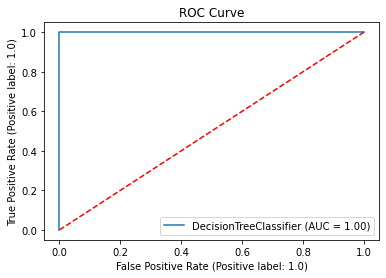

In [87]:
threshold(tree,1, 0.5)
print('\n')
plot_roc_curve(tree, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        99
         1.0       1.00      1.00      1.00       835

    accuracy                           1.00       934
   macro avg       1.00      1.00      1.00       934
weighted avg       1.00      1.00      1.00       934





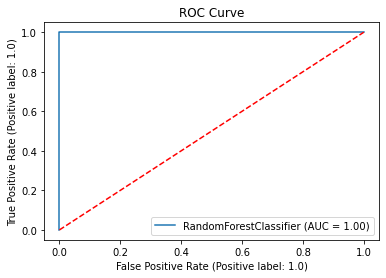

In [88]:
threshold(forest,1, 0.5)
print('\n')
plot_roc_curve(forest, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        99
         1.0       1.00      1.00      1.00       835

    accuracy                           1.00       934
   macro avg       1.00      1.00      1.00       934
weighted avg       1.00      1.00      1.00       934





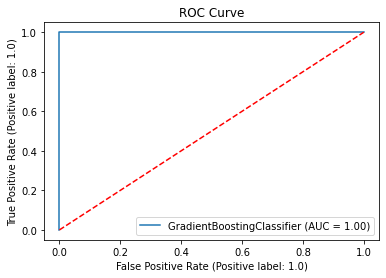

In [89]:
threshold(xg_model,1, 0.5)
print('\n')
plot_roc_curve(xg_model, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

_______________________

# Voting Classifier (test)


/Users/mada/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        99
         1.0       1.00      1.00      1.00       835

    accuracy                           1.00       934
   macro avg       1.00      1.00      1.00       934
weighted avg       1.00      1.00      1.00       934

VotingClassifier
VotingClassifier, Accuracy (Train Set) :  1.0
VotingClassifier, Accuracy (Val Set) :  1.0
VotingClassifier, Accuracy (test Set) :  1.0


precision : 1.0
recall    : 1.0
f1        : 1.0
AUC score : 1.0




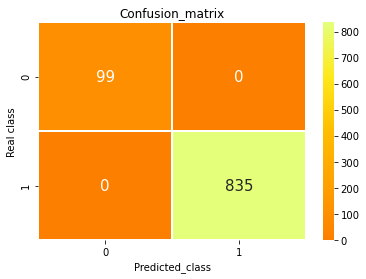

In [90]:
#import Voting Classifier

from sklearn.ensemble import VotingClassifier

#instantiating three classifiers

xg_model=XGBClassifier(verbosity=0)
tree = DecisionTreeClassifier()
forest = RandomForestClassifier(n_estimators= 7)

voting_clf = VotingClassifier(estimators=[('xgoots',xg_model),('DecisionTree',tree),
                                          ('RandomForest',forest)], voting='hard')

#fit and predict using training and test dataset respectively

voting_clf.fit(X_train, y_train)
predictions = voting_clf.predict(X_test)

#Evaluation matrics

#print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

accuracy_train_vo = voting_clf.score(X_train_smote, y_train_smote)  #get accuracy on train set
accuracy_valid_vo = voting_clf.score(X_val, y_val)  #get accuracy on valid set
accuracy_test_vo = voting_clf.score(X_test, y_test)
print("VotingClassifier")
print("VotingClassifier, Accuracy (Train Set) : ", accuracy_train_vo)
print("VotingClassifier, Accuracy (Val Set) : ", accuracy_valid_vo)
print("VotingClassifier, Accuracy (test Set) : ", accuracy_test_vo)
print('\n')
print("precision :",precision_score(y_test,predictions))
print("recall    :",recall_score(y_test,predictions))
print("f1        :",f1_score(y_test,predictions))
print("AUC score :",metrics.roc_auc_score(y_test, predictions, average=None))
print('\n')

cnf_matrix = confusion_matrix(y_test,predictions)
sns.heatmap(cnf_matrix,cmap="Wistia_r", annot_kws={"size": 15},annot=True,linewidths=0.7, fmt='g')
plt.title("Confusion_matrix")
plt.xlabel("Predicted_class")
plt.ylabel("Real class")
plt.savefig("voting.png")


#metrics.plot_roc_curve(voting_clf, X_test, y_test)
plt.savefig("voting1.png")
plt.show()

_________________

# Saving The Model

In [91]:
# save the model
file = open('weather_project_.pkl', 'wb')
pickle.dump(weather, file)

In [92]:
# open the model
model = open('weather_project_.pkl','rb')
weather_project = pickle.load(model)

____

## Conclusion

- **Exctrating the data and preparte for modeling by:**
    * Encoding columns into categorical columns.
    * Handling Missing and NULL Values.
    * Convert the data types

- **Handle the imbalanced dataset by using SMOTE.**

- **Apply the models in the train set, we came up with:**
    * Decision Tree, Gradient Boosting Classifier and Random Forest were the best model with AUC score = 100%

____